### K-Nearest Neighbor Classifier

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data
labels = iris.target

for i in [0,79,99,101]:
    print(f"index: {i:3}, features: {data[i]},label:{labels[i]}")
    

index:   0, features: [5.1 3.5 1.4 0.2],label:0
index:  79, features: [5.7 2.6 3.5 1. ],label:1
index:  99, features: [5.7 2.8 4.1 1.3],label:1
index: 101, features: [5.8 2.7 5.1 1.9],label:2


In [2]:
# seeding is only necessary for the website
#so that the value are always equal
np.random.seed(42)
indices = np.random.permutation(len(data))

n_training_samples = 12
learn_data = data[indices[:-n_training_samples]]
learn_labels = labels[indices[:-n_training_samples]]
test_data = data[indices[-n_training_samples:]]
test_labels = labels[indices[-n_training_samples:]]

print("The first samples of our learn set:")
#print(f"{'index': 7s}{"data":20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d}   {learn_data[i]}     {learn_labels[i]:3}")
    
print("The first samples of our test set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d} {learn_data[i]} {learn_labels[i]:3}")

The first samples of our learn set:
   0   [6.1 2.8 4.7 1.2]       1
   1   [5.7 3.8 1.7 0.3]       0
   2   [7.7 2.6 6.9 2.3]       2
   3   [6.  2.9 4.5 1.5]       1
   4   [6.8 2.8 4.8 1.4]       1
The first samples of our test set:
index  data                label
   0 [6.1 2.8 4.7 1.2]   1
   1 [5.7 3.8 1.7 0.3]   0
   2 [7.7 2.6 6.9 2.3]   2
   3 [6.  2.9 4.5 1.5]   1
   4 [6.8 2.8 4.8 1.4]   1


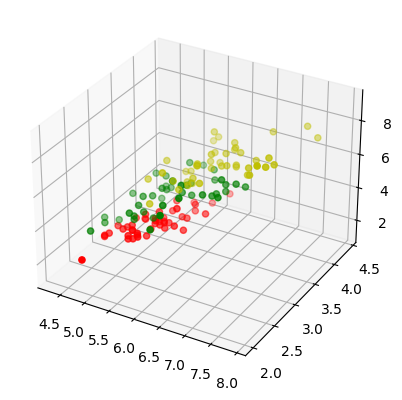

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colours = ("r","b")
x = []
for iclass in range(3):
    x.append([[],[],[]])
    for i in range(len(learn_data)):
        if learn_labels[i] == iclass:
            x[iclass][0].append(learn_data[i][0])
            x[iclass][1].append(learn_data[i][1])
            x[iclass][2].append(sum(learn_data[i][2:]))
            
colours = ('r','g','y')

fig  = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
    ax.scatter(x[iclass][0],x[iclass][1],x[iclass][2],c=colours[iclass])
    
plt.show()

## Page 77

### Distance Metrics

#### Determining The Neighbors

In [4]:
import numpy as np
def distance(instance1, instance2):
    #Calculates the Eucledian distance between two instances
    return np.linalg.norm(np.subtract(instance1, instance2))
print(distance([3,5],[1,1]))
print(distance(learn_data[3], learn_data[44]))

4.47213595499958
3.4190641994557516


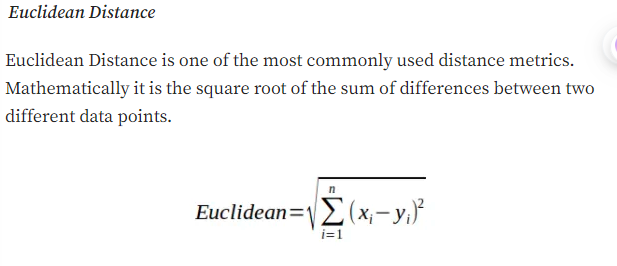

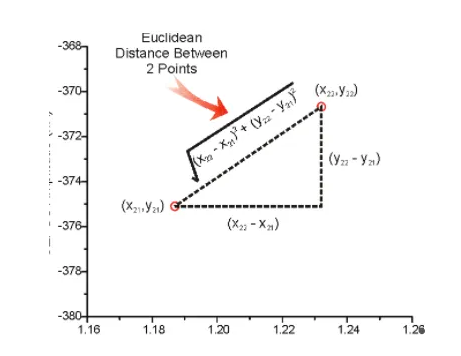

#### Manhattan Distance

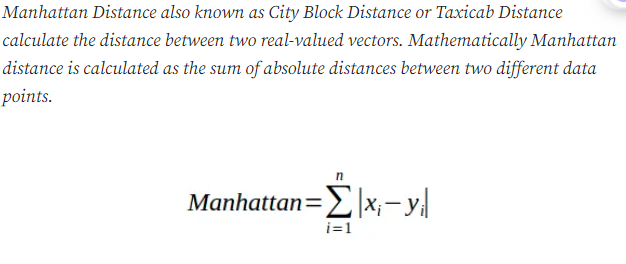

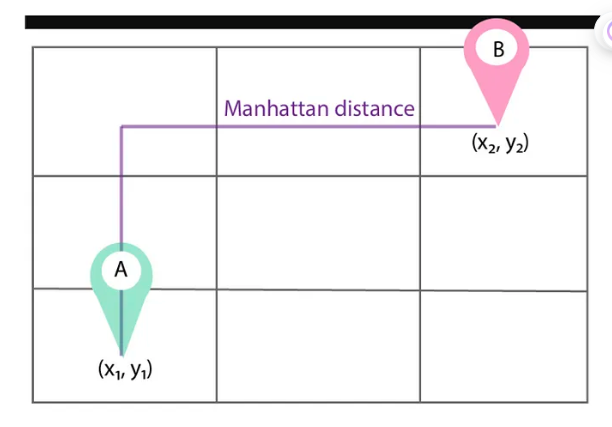

In [5]:
#calculating manhattan distance betweenn vectors
from math import sqrt
def manhattan_distance(a,b):
    return sum(abs(e1-e2) for e1, e2 in zip(a,b))

row1 = [10,20,15,10,5]
row2 = [12,24,18,8,7]

dist = manhattan_distance(row1,row2)
print(dist)

13


#### Chebyshev Distance

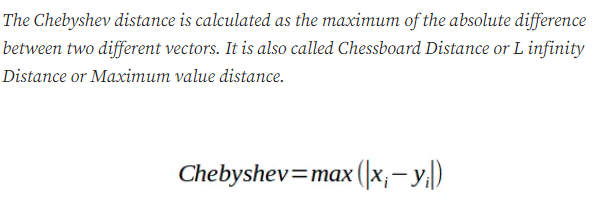

In [6]:
def chebyshev_distance(x,y):
    distance = []
    for a,b in zip(x,y):
        distance.append(abs(a-b))
        print(distance)
    return max(distance)
print("Chebyshev Distance:",chebyshev_distance([1,3,4,1],[3,2,1,1]))

[2]
[2, 1]
[2, 1, 3]
[2, 1, 3, 0]
Chebyshev Distance: 3


#### Minkowski Distance

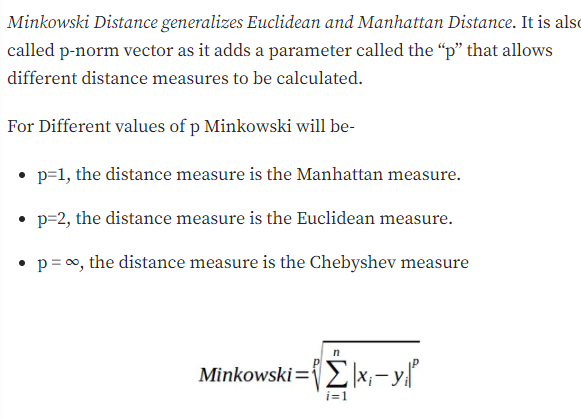

In [7]:
from math import sqrt
def minkowski_distance(a,b,p):
    re = sum(abs(e1-e2)**p for e1,e2 in zip(a,b))**(1/p)
    return re

row1 = [10,20,15,10,5]
row2 = [12,24,18,8,7]

dist = minkowski_distance(row1,row2,1)
print(dist)
dist = minkowski_distance(row1,row2,2)
print(dist)

13.0
6.082762530298219


#### Hamming Distance

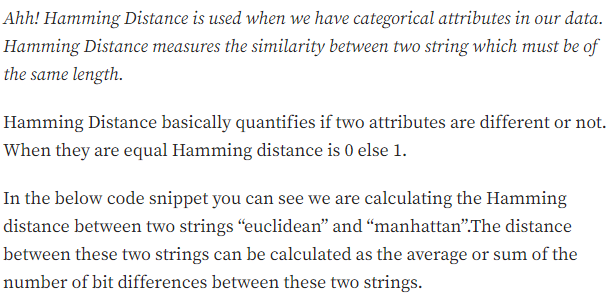

In [8]:
def hamming_distance(x,y):
    distance = 0
    for a,b in zip(x,y):
        if a!=b:
            distance +=1
    return distance
print("Hamming Distance:", hamming_distance("euclidean","manhattan"))

Hamming Distance: 7


#### Cosine Similarith

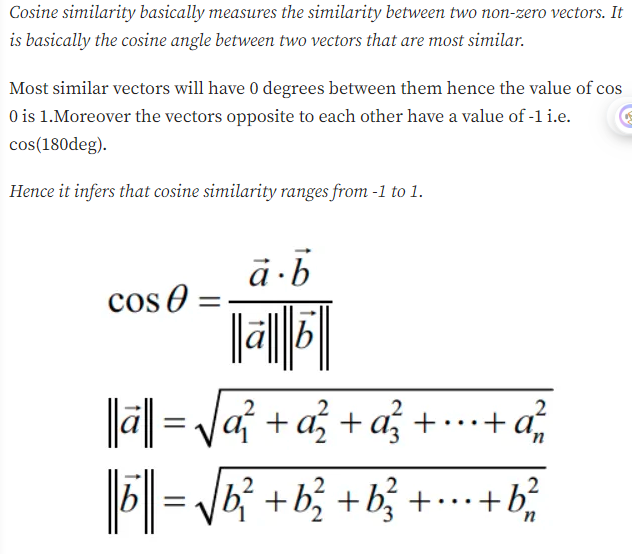

In [9]:
def cosine_similarity(x,y):
    numerator = 0
    sum_x = 0
    sum_y = 0
    for a,b in zip(x,y):
        numerator +=sum([a *b])
        sum_x += sum([a**2])
        sum_y += sum([b**2])
        
    denominator = round(sqrt(sum_x) * sqrt(sum_y))
    return numerator /denominator

print("Cosine Similarity:",cosine_similarity([1,3,4,1],[3,2,1,1]))

Cosine Similarity: 0.7


#### Jaccard Similarity

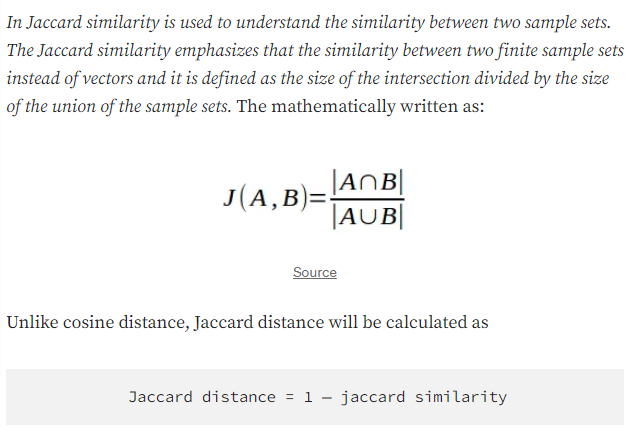

In [10]:
def jaccard_similarity(x,y):
    intersection = len(set(x).intersection(set(y)))
    union = len(set(x).union(set(y)))
    return(intersection / union)

print("Jaccard Similarity:",jaccard_similarity([0,1,2,5,6],[0,2,3,4,5,7,9]))
print("Jaccard Similarity:",1-jaccard_similarity([0,1,2,5,6],[0,2,3,4,5,7,9]))

Jaccard Similarity: 0.3333333333333333
Jaccard Similarity: 0.6666666666666667


### Code Page78

In [11]:
def get_neightbors(training_set,
                  labels,
                  test_instance,
                   k,
                  distance):
    """get_neighbors calculates a list of the k Nearest Neighbors
    of an instance test_labels. 
    the function returns a list of k 3-tuples.
    where
    index    is the index from the training_set
    dist     is the distance the tesst_instance and the 
             instance training_set index"""
    
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance,training_set[index])
        distances.append((training_set[index],dist,labels[index]))
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:k]
        return neighbors

In [12]:
for i in range(5):
    neighbors = get_neightbors(learn_data,
                            learn_labels,
                            test_data[i],
                            3,
                            distance=distance)
    print("Index:         ",i,'\n',
          "Testset Data:  ",test_data[i],'\n',
          "Testset Label: ",test_labels[i],'\n',
          "Neighbors:     ",neighbors,"\n")

Index:          0 
 Testset Data:   [5.7 2.8 4.1 1.3] 
 Testset Label:  1 
 Neighbors:      [(array([6.1, 2.8, 4.7, 1.2]), 0.728010988928052, 1)] 

Index:          1 
 Testset Data:   [6.5 3.  5.5 1.8] 
 Testset Label:  2 
 Neighbors:      [(array([6.1, 2.8, 4.7, 1.2]), 1.0954451150103324, 1)] 

Index:          2 
 Testset Data:   [6.3 2.3 4.4 1.3] 
 Testset Label:  1 
 Neighbors:      [(array([6.1, 2.8, 4.7, 1.2]), 0.6244997998398398, 1)] 

Index:          3 
 Testset Data:   [6.4 2.9 4.3 1.3] 
 Testset Label:  1 
 Neighbors:      [(array([6.1, 2.8, 4.7, 1.2]), 0.5196152422706639, 1)] 

Index:          4 
 Testset Data:   [5.6 2.8 4.9 2. ] 
 Testset Label:  2 
 Neighbors:      [(array([6.1, 2.8, 4.7, 1.2]), 0.9643650760992956, 1)] 



### Voting To Get A Single Result

In [14]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] +=1
    return class_counter.most_common(1)[0][0]

In [15]:
for i in range(n_training_samples):
    neighbors = get_neightbors(learn_data,
                              learn_labels,
                              test_data[i],
                              3,
                              distance=distance)
    print("index: ", i,
        ", result of vote: ", vote(neighbors),
        ", label: ", test_labels[i],
        ", data: ", test_data[i])


index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  1 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  1 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  1 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  1 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  1 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  1 , label:  2 , data:  [7.1 3.  5.9 2.1]


In [16]:
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] +=1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][0]
    return winner, votes4winner/sum(votes)

In [17]:
for i in range(n_training_samples):
    neighbors = get_neightbors(learn_data,
                              learn_labels,
                              test_data[i],
                              5,
                              distance=distance)
    print("index: ", i,
        ", vote_prob: ", vote_prob(neighbors),
        ", label: ", test_labels[i],
        ", data: ", test_data[i])

index:  0 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , vote_prob:  (1, 1.0) , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , vote_prob:  (1, 1.0) , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , vote_prob:  (1, 1.0) , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , vote_prob:  (1, 1.0) , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , vote_prob:  (1, 1.0) , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , vote_prob:  (1, 1.0) , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , vote_prob:  (1, 1.0) , label:  2 , data:  [7.1 3.  5.9 2.1]


### The Weighted Nearest Neighbour Classifier

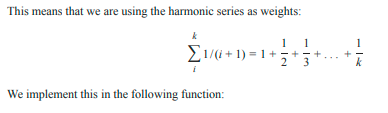